<a href="https://colab.research.google.com/github/deepkts/deepkts/blob/main/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확인하세요!

### 제출 전에 모든 코드가 순차적으로 잘 작동하는지 확인하세요. 
- **커널을 다시 시작**한 다음(메뉴바에서 Kernel$\rightarrow$Restart 선택) **모든 셀을 실행**해 보세요(메뉴바에서 Cell$\rightarrow$Run All 선택).

### 지정 셀의 지정 영역에서만 코드를 작성했는지 확인하세요.
- `YOUR CODE HERE`이 적혀 있는 셀에 대한 코드만 채점에 반영됩니다.
- `YOUR CODE HERE` ~ `YOUR CODE ENDS HERE` 사이에 본인의 코드를 작성하세요.
- 지정 셀 이외에 본인이 코드 실행 결과를 확인하기 위한 용도로 셀을 추가해도 됩니다.
    - **제출 시 지정 셀에서는 정답 이외에 결과 확인을 위한 코드 등은 제거하고 제출해 주세요!**
    - **기존 셀을 삭제하지 마세요! 채점에 불이익이 있을 수 있습니다.**

### 제출 방법
- 시간 내에 문제를 풀고, 본인의 github repo에 push 하세요.
    - **디렉토리 구조가 변하면 안 됩니다.** `codestates/ds-sc2xx`와 디렉토리 구조가 동일해야 합니다. 답안 파일의 이름을 변경하지 않았는지, 기존에 없던 폴더가 추가되지 않았는지 등을 확인하세요.
    - **코드스테이츠 가입 시 연동한 github 계정을 사용해야 합니다.**
    - **branch를 변경하여 작업하지 마세요.**
        - `master` branch에의 제출 사항에 대해서만 평가합니다.
        - 본인의 github repo `master` branch에 제출이 잘 되어 있는지 확인하세요.

---

# SC22x
 

# Part 3 - Confusion Matrix


## 3.1 Confusion Matrix 계산
- sklearn 라이브러리를 사용하지 않고, 이진분류 모델의 y_pred, y_real로부터 TP, TN, FP, FN의 수를 구하는 `confusion_matrix` 함수를 작성하세요.
- y_pred, y_real은 길이($\ge2$)가 동일하고 값이 0 또는 1인 리스트입니다.
- 1을 Positive, 0을 Negative로 가정합니다.

In [9]:
import numpy as np


def confusion_matrix(y_pred, y_real):
    tp, tn, fp, fn = -1, -1, -1, -1

    tp = sum((y_pred == 1) & (y_real == 1))
    # YOUR CODE HERE
    tn = sum((y_pred == 0) & (y_real == 0))
    fp = sum((y_pred == 0) & (y_real == 1))
    fn = sum((y_pred == 1) & (y_real == 0))
    
    # YOUR CODE ENDS HERE

    return tp, tn, fp, fn

In [10]:
y_pred = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])
y_real = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
tp, tn, fp, fn = confusion_matrix(y_pred, y_real)
print(f"(TP, TN, FP, FN) = ({tp}, {tn}, {fp}, {fn})")

(TP, TN, FP, FN) = (8, 5, 3, 4)


### 3.2 Accuracy, Precision, Recall, F1 계산
- sklearn 라이브러리를 사용하지 않고, 이진분류 모델의 y_pred, y_real로부터 Accuracy, Precision, Recall, F1을 구하는 `calculate_performances` 함수를 작성하세요.
- Accuracy, Precision, Recall은 모두 항상 양수라고 가정해도 됩니다.

In [15]:
def calculate_performances(y_pred, y_real):
    accuracy = 0
    precision = 0
    recall = 0
    f1 = 0

    tp, tn, fp, fn = confusion_matrix(y_pred, y_real)
    # YOUR CODE HERE
    accuracy = (tp + tn) / (tp + tn + fn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * ((precision*recall)/(precision + recall))
    # YOUR CODE ENDS HERE

    return accuracy, precision, recall, f1

In [16]:
y_pred = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])
y_real = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
accuracy, precision, recall, f1 = calculate_performances(y_pred, y_real)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.65
Precision: 0.7272727272727273
Recall: 0.6666666666666666
F1: 0.6956521739130435


### 3.3 TPR, FPR, AUC
- sklearn 라이브러리를 사용하지 않고, 이진분류 모델의 예측 확률, 실제 label 및 threshold로부터 TPR, FPR을 구하는 `calculate_prs` 함수를 작성하세요.
    - `y_pred_proba` > `threshold`일 때 모델은 해당 sample을 1이라고 분류합니다.

In [17]:
def calculate_prs(y_pred_proba, y_real, threshold):
    TPR = 0.0
    FPR = 0.0

    # YOUR CODE HERE
    y_pred = y_pred_proba > threshold    
    
    tp = sum((y_pred == 1) & (y_real == 1))
    tn = sum((y_pred == 0) & (y_real == 0))
    fp = sum((y_pred == 0) & (y_real == 1))
    fn = sum((y_pred == 1) & (y_real == 0))
    
    TPR = tp / (tp + fn)
    FPR = fp / (fp + tn)
    
    # YOUR CODE ENDS HERE

    return TPR, FPR

- 아래 셀을 실행하여 예시 입력에 대해 각 threshold에서의 TPR, FPR을 구해 보세요.
- x축을 FPR, y축을 TPR로 하는 ROC Curve를 확인해 보세요.

Threshold=1.986, TPR=nan, FPR=0.550 
Threshold=0.986, TPR=nan, FPR=0.550 
Threshold=0.980, TPR=1.000, FPR=0.526 
Threshold=0.893, TPR=1.000, FPR=0.500 
Threshold=0.844, TPR=1.000, FPR=0.471 
Threshold=0.699, TPR=1.000, FPR=0.438 
Threshold=0.666, TPR=0.800, FPR=0.467 
Threshold=0.649, TPR=0.667, FPR=0.500 
Threshold=0.626, TPR=0.714, FPR=0.462 
Threshold=0.622, TPR=0.750, FPR=0.417 
Threshold=0.616, TPR=0.778, FPR=0.364 
Threshold=0.589, TPR=0.800, FPR=0.300 
Threshold=0.536, TPR=0.727, FPR=0.333 
Threshold=0.529, TPR=0.667, FPR=0.375 
Threshold=0.529, TPR=0.615, FPR=0.429 
Threshold=0.482, TPR=0.643, FPR=0.333 
Threshold=0.406, TPR=0.600, FPR=0.400 
Threshold=0.345, TPR=0.562, FPR=0.500 
Threshold=0.331, TPR=0.588, FPR=0.333 
Threshold=0.094, TPR=0.611, FPR=0.000 
Threshold=0.033, TPR=0.579, FPR=0.000 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


Text(0.5, 1.0, 'ROC Curve')

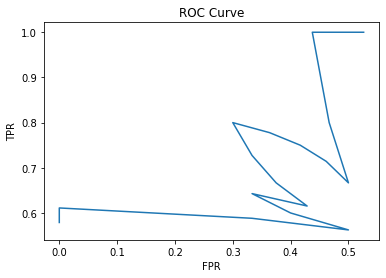

In [18]:
import matplotlib.pyplot as plt

y_pred_proba = np.array(
    [
        0.62574153,
        0.62212357,
        0.64912789,
        0.98636048,
        0.84379945,
        0.61600836,
        0.33085066,
        0.34542886,
        0.58859945,
        0.97971037,
        0.52886705,
        0.89255893,
        0.69924888,
        0.66564046,
        0.52909411,
        0.4817106,
        0.03277238,
        0.53550684,
        0.40602853,
        0.09380067,
    ]
)
y_real = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
thresholds = np.sort(list(y_pred_proba) + [np.max(y_pred_proba) + 1])[::-1]
tpr_fpr_by_threshold = [calculate_prs(y_pred_proba, y_real, th) for th in thresholds]
tprs, fprs = list(zip(*tpr_fpr_by_threshold))
for th, tpr, fpr in zip(thresholds, tprs, fprs):
    print(f"Threshold={th:.3f}, TPR={tpr:.3f}, FPR={fpr:.3f} ")


plt.plot(fprs, tprs)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")


---

# 수고하셨습니다!